In [11]:
from utils import *

# Harris corners

In [12]:
imageFull = mp_image.imread(os.path.join(img_src,'mountain.jpg'))/255
image = rgb2gray(imageFull)

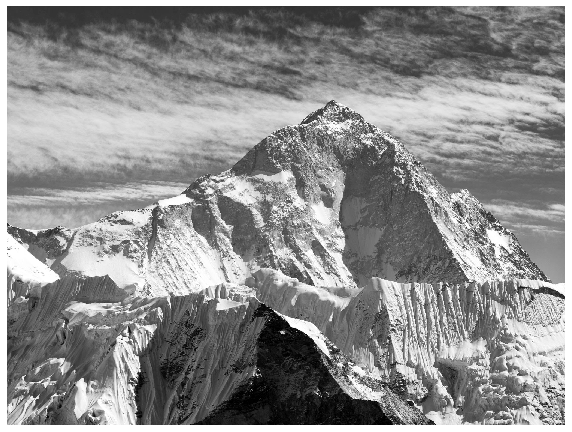

In [13]:
img_show(image,cmap=cm.gray)

Applichiamo l'algoritmo di Harris per il corner detection. La formula generale prevede il calcolo della matrice che coinvolge i cambiamenti locali, 

$$
M = \sum_{x,y} w(x,y) 
\left[
\begin{array}{lr}
I^{2}_{x} & I_x I_y \\
I_xI_y & I^{2}_{y} \\
\end{array}
\right]
$$

dove $I_x$ e $I_y$ sono rispettivamente le derivate su $x$ e $y$. I punti de

L'algoritmo si basa su una serie di passi. Vediamoli in sequenza. 

1. Calcola le derivate $G^x_{\sigma}*I$ e $G^y_{\sigma}*I$

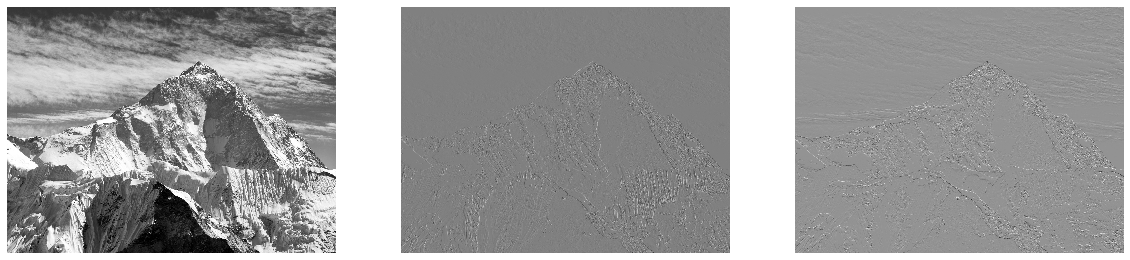

In [14]:
def gradient_x(imggray,sigma=1):
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    
    img_blur = ndimage.gaussian_filter(imggray,sigma,mode='constant', cval=0.0)
    return convolve(img_blur,kernel_x,mode='constant', cval=0.0)

def gradient_y(imggray,sigma=1):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    img_blur = ndimage.gaussian_filter(imggray,sigma,mode='constant', cval=0.0)
    return convolve(img_blur,kernel_y,mode='constant', cval=0.0)

I_x = gradient_x(image,sigma=0.5)
I_y = gradient_y(image,sigma=0.5)



fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 3, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(I_x,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(I_y,cmap=cm.gray)
plt.axis('off')



plt.show()

2. Calcola i prodotti $I^2_x = I_x\cdot I_x$ e $I^2_y = I_x \cdot I_y$ per ogni pixel



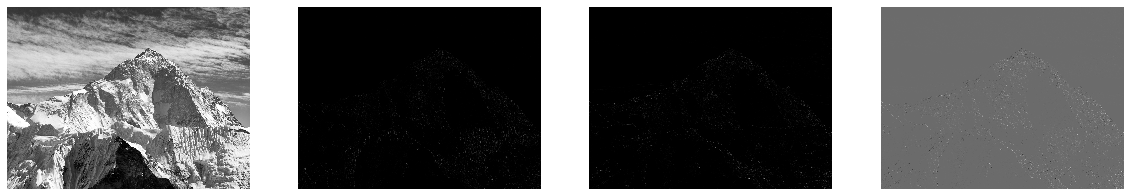

In [15]:
I_xx = I_x**2
I_yy = I_y**2

I_xy = I_x*I_y



fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 4, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 2) 
plt.imshow(I_xx,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 3) 
plt.imshow(I_yy,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 4) 
plt.imshow(I_xy,cmap=cm.gray)
plt.axis('off')



plt.show()

3. Calcola la somma "locale" dei prodotti

$$S^2_x = G_{\sigma'}*I^2_x$$

$$S^2_y = G_{\sigma'}*I^2_y$$

$$S_{xy} = G_{\sigma'}*I_{x,y}$$



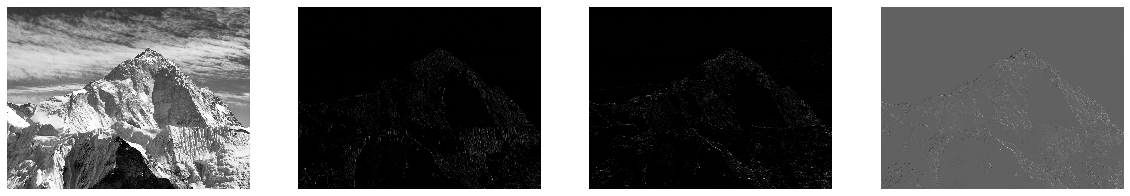

In [16]:
sigma = 1
S_xx = ndimage.gaussian_filter(I_xx,sigma,mode='constant', cval=0.0)
S_yy = ndimage.gaussian_filter(I_yy,sigma,mode='constant', cval=0.0)
S_xy = ndimage.gaussian_filter(I_xy,sigma,mode='constant', cval=0.0)



fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 4, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 2) 
plt.imshow(S_xx,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 3) 
plt.imshow(S_yy,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 4, 4) 
plt.imshow(S_xy,cmap=cm.gray)
plt.axis('off')



plt.show()

4. Calcola il responso

$$R = S^2_x\cdot S^2_y - S_{xy}S_{xy} - k (S^2_x + S^2_y)^2$$

In [17]:
k = 0.05

detM = S_xx*S_yy - S_xy*S_xy

trM = S_xx + S_yy

R = detM - k*trM**2


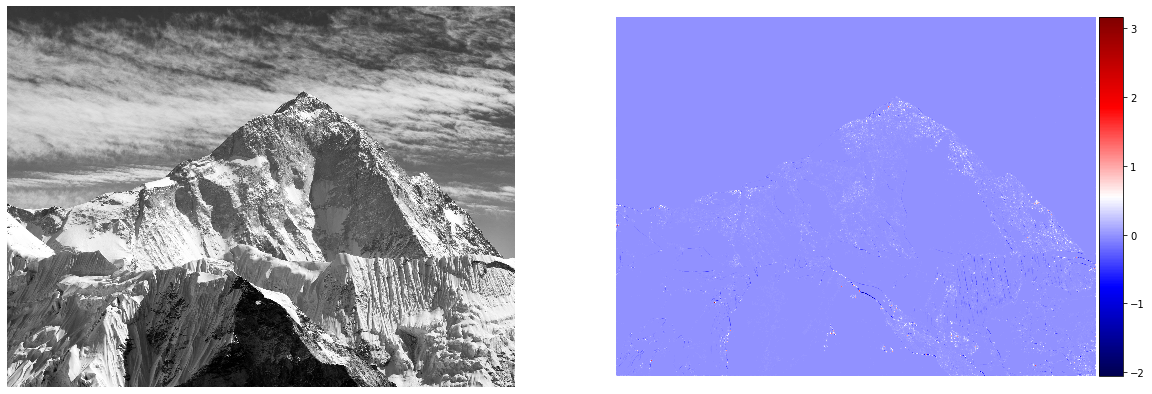

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 2, 2) 
ax = plt.gca()
im  = plt.imshow(R,cmap=cm.seismic)
plt.axis('off')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()

5. Applica una soglia a R

    - $R > \alpha$ con indica un corner
    - $R < 0$ e $|R| > \alpha$ indica un edge

In [19]:
alpha = 0.1

sz = image.shape

annotatedImage = image.reshape(sz[0],sz[1],-1).repeat(3,axis=2)

for rowindex, response in enumerate(R):
    for colindex, r in enumerate(response):
        if r > alpha:
            # corner
#            print(f'corner:{rowindex,colindex}')
            annotatedImage[rowindex, colindex] = [1,0,0]
        elif r < 0 and np.abs(r) > alpha:
            #  edge
#            print(f'line:{rowindex,colindex}')
            annotatedImage[rowindex, colindex] = [0,1,0]
            


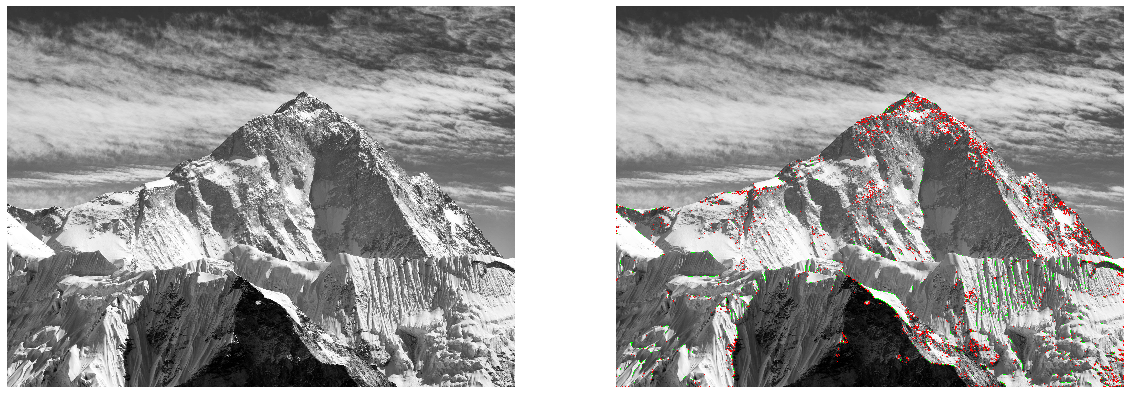

In [20]:
fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(annotatedImage)
plt.axis('off')


plt.show()

5. (**esercizio**) Calcola la non-maximal suppression